# Module 2, Lab 2 - Non-Linear Regression

## Import libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Differnt types of linear regression

### Simple Linear

$$ y = ax + b $$

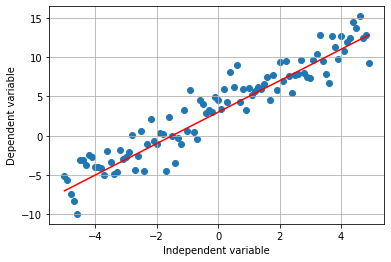

In [38]:
x = np.arange(-5.0, 5.0, 0.1)

y = 2*x + 3
y_noise = 2* np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()

### Polynomial

Example of a $3^{rd}$ order ploynomial

$$ y = ax^3 + bx^2 + cx + d $$

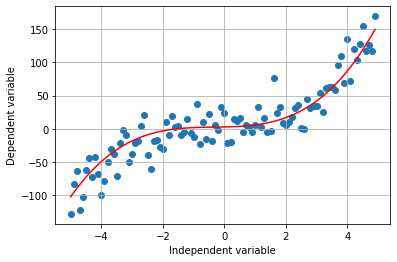

In [39]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()


### Quadratic

$$ y = x^2 $$

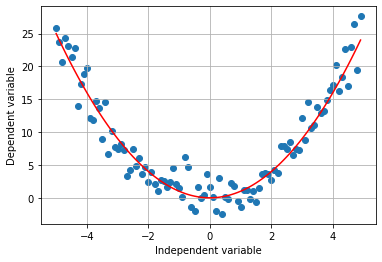

In [40]:
x = np.arange(-5.0, 5.0, 0.1)

# y = x ** 2
y = np.power(x, 2)
y_noise = 2 * np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()

### Exponential

$$ y = a + bc^x $$

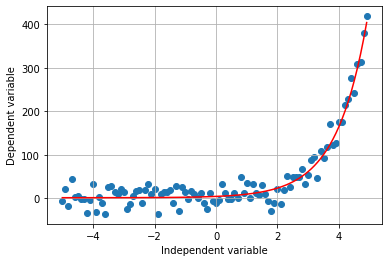

In [41]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1 + 2*1.5*np.exp(x)
y_noise = 20 * np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()

### Logaritmic

$$ y = log(x) $$

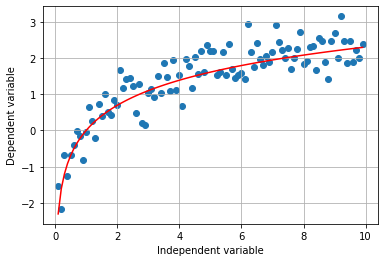

In [42]:
x = np.arange(0.1, 10.0, 0.1)

y = np.log(x)
y_noise = 0.4 * np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()

### Sigmoidal/Logistic

$$ y = a + \frac{b}{1  + c^{(x-d)}} $$

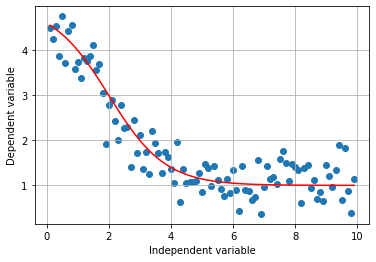

In [43]:
x = np.arange(0.1, 10.0, 0.1)

y = 1 + 4/(1 + np.power(3, x-2)) # a = 1, b = 4. c = 3, d = 2
y_noise = 0.4 * np.random.normal(size = x.size)
y_data = y + y_noise

plt.scatter(x, y_data)
plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()

## Non-Linear Regression

### Load data

In [44]:
import pandas as pd

data = pd.read_csv("../data/china_gdp.csv")
data.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Plot data

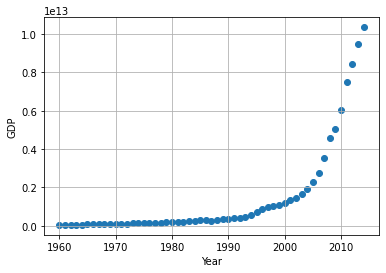

In [45]:
x_data, y_data = (data["Year"].values, data["Value"].values)

plt.scatter(x_data, y_data)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.grid()
plt.show()

### Choosing the model 

The source recommends modeling the data as a logistical trend. The properties of a logistical curve is that is starts out with a slow growth, raises exponentially and then flattens out.  

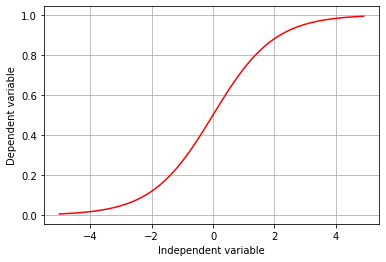

In [46]:
x = np.arange(-5.0, 5.0, 0.1)

# y = 1 + 1/(1 + np.power(3, -x)) # similar to previous example
y = 1/(1 + np.exp(-x)) # variation suggested to use for given sample data

plt.plot(x, y, "r")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.grid()
plt.show()

### Building the model

The generic form of a Sigmoid can be expressed as:

$$ y = \frac{1}{1 + e^{\beta_1 (x - \beta_2)}} $$

Where:  

 * $\beta_1$ is the steepness
 * $\beta_2$ slides the curve over the x-axis

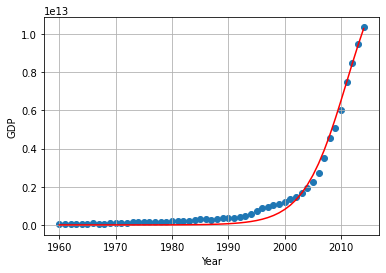

In [47]:
def sigmoid(x, beta_1, beta_2):
    y = 1 / (1 + np.exp(beta_1 * (x - beta_2)))
    return y

# trial and error 
beta_1 = -0.26
beta_2 = 2011.0
y_model = 15e12 * sigmoid(x_data, beta_1, beta_2)

plt.scatter(x_data, y_data)
plt.plot(x_data, y_model, "r")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.grid()
plt.show()

### Curve fitting

In [48]:
from scipy.optimize import curve_fit

# normalize data, required for scipy->optimize (?)
x_norm = x_data / max(x_data)
y_norm = y_data / max(y_data)

# determine optimal beta_1&2
popt, _ = curve_fit(sigmoid, x_norm, y_norm)
beta_1 = popt[0]
beta_2 = popt[1]
print("Optimal paramters: beta_1: {:.4f}, beta_2: {:.4f}".format(beta_1, beta_2))

Optimal paramters: beta_1: -690.4503, beta_2: 0.9972


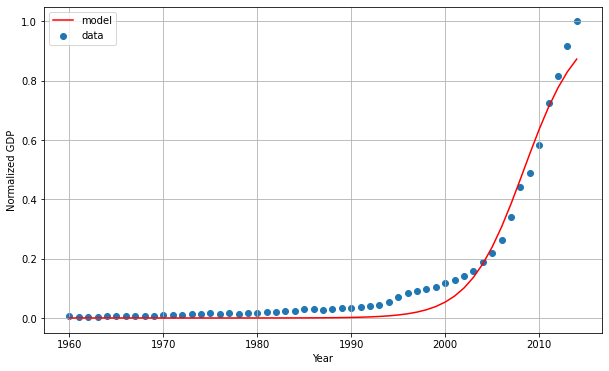

In [49]:

x_plot = np.linspace(x_data[0], x_data[-1], x_data.size) 
y_plot = sigmoid(x_plot / max(x_data), beta_1, beta_2)

plt.figure(figsize=(10, 6))
plt.scatter(x_plot, y_norm, label="data")
plt.plot(x_plot, y_plot, "r", label="model")
plt.xlabel("Year")
plt.ylabel("Normalized GDP")
plt.legend()
plt.grid()
plt.show()

### Model using `Train` and `Test` method

In [50]:
# create Train and Test datasets
mask = np.random.rand(len(data)) < 0.8

x_train = x_norm[mask]
y_train = y_norm[mask]

x_test = x_norm[~mask]
y_test = y_norm[~mask]

# determine beta_1/2 from training data
beta_opt, _ = curve_fit(sigmoid, x_train, y_train)
beta_1 = beta_opt[0]
beta_2 = beta_opt[1]
print("Optimal paramters: beta_1: {:.4f}, beta_2: {:.4f}".format(beta_1, beta_2))

Optimal paramters: beta_1: -736.8478, beta_2: 0.9972


In [51]:
# evaluate model accuracy
from sklearn.metrics import r2_score

# predict y based on model
y_hat = sigmoid(x_test, beta_1, beta_2)
y_hat_plot = sigmoid(x_norm, beta_1, beta_2)

def evaluate_model(y_test, y_hat):
    MAE = np.mean(np.absolute(y_hat - y_test))
    MSE = np.mean((y_hat - y_test) ** 2)
    R2 = r2_score(y_hat, y_test)

    return (MAE, MSE, R2)

accuracy = evaluate_model(y_test, y_hat)
print("Mean absolute error: {:.2f}".format(accuracy[0]))
print("Mean Squared Error: {:.2f}".format(accuracy[1]))
print("R2 score: {:.2f}".format(accuracy[2]))

Mean absolute error: 0.03
Mean Squared Error: 0.00
R2 score: 0.97


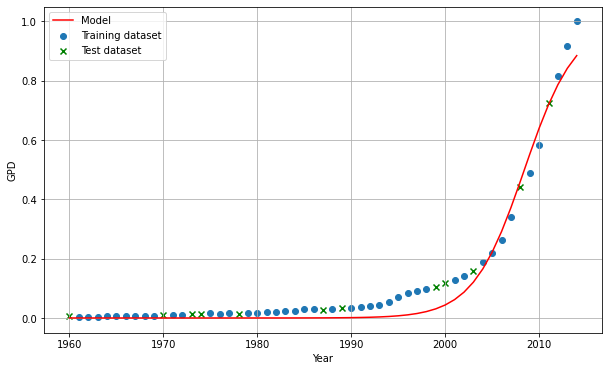

In [52]:
# plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_train * max(x_data), y_train, label="Training dataset")
plt.scatter(x_test * max(x_data), y_test, color="g" , marker="x", label="Test dataset")
plt.plot(x_data, y_hat_plot, color="r", label="Model")
plt.xlabel("Year")
plt.ylabel("GPD")
plt.grid()
plt.legend()
plt.show()